In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df_spy_div = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/main/SPY%201993-2024.csv')

# Display the DataFrame
print(df_spy_div)

           Date    Open    High     Low  Close*  Adj Close**      Volume
0     07-Oct-24   571.3  571.96  566.63  567.80       567.80  49,814,900
1     04-Oct-24  572.35  573.36  568.10  572.98       572.98  42,939,100
2     03-Oct-24  567.36  569.80  565.49  567.82       567.82  40,846,500
3     02-Oct-24  567.71  569.90  565.27  568.86       568.86  38,097,800
4     01-Oct-24   573.4  574.06  566.00  568.62       568.62  72,668,800
...         ...     ...     ...     ...     ...          ...         ...
8102  04-Feb-93   44.97   45.09   44.47   45.00        25.20     531,500
8103  03-Feb-93   44.41   44.84   44.38   44.81        25.10     529,400
8104  02-Feb-93   44.22   44.38   44.13   44.34        24.84     201,300
8105  01-Feb-93   43.97   44.25   43.97   44.25        24.78     480,500
8106  29-Jan-93   43.97   43.97   43.75   43.94        24.61   1,003,200

[8107 rows x 7 columns]


#Examine and search for missing values

In [ ]:
# Print the range of values per column
column_ranges = df_spy_div.describe(include='all').transpose()[['min', 'max']]
print("___Range of Values per Column___")
print(column_ranges)

# Print the number of missing values per column
print("___Missing Values___")
print(df_spy_div.isnull().sum())

___Range of Values per Column___
               min     max
Date           NaN     NaN
Open           NaN     NaN
High         43.53  574.71
Low          42.81  570.42
Close*       43.41  573.76
Adj Close**  24.31  573.76
Volume         NaN     NaN
___Missing Values___
Date             0
Open             0
High           128
Low            128
Close*         128
Adj Close**    128
Volume         128
dtype: int64


#Isolate Dividend Rows and Filter them out

In [ ]:
# Find all rows with missing values
dividend_rows = df_spy_div.loc[df_spy_div.isnull().any(axis=1), :].iloc[::-1].reset_index(drop=True)

# Cross-check missing rows
print("Dividend Rows with Missing Values")
print(dividend_rows)

# Check if the 'Open' column contains the word 'Dividend'
contains_dividend = dividend_rows['Open'].astype(str).str.contains('Dividend', na=False)

# Count how many rows contain 'Dividend'
num_dividend = contains_dividend.sum()

# Count how many rows do not contain 'Dividend'
num_not_dividend = len(dividend_rows) - num_dividend

# Display the counts
print(f"Rows containing 'Dividend': {num_dividend}")
print(f"Rows NOT containing 'Dividend': {num_not_dividend}")

# Now drop all rows where there are missing values, regardless of 'Dividend'
df_spy = df_spy_div.dropna().iloc[::-1].reset_index(drop=True)

# Check if all missing values are handled
print(df_spy)
print(df_spy.isnull().sum())

Dividend Rows with Missing Values
          Date            Open  High  Low  Close*  Adj Close** Volume
0    19-Mar-93  0.213 Dividend   NaN  NaN     NaN          NaN    NaN
1    18-Jun-93  0.318 Dividend   NaN  NaN     NaN          NaN    NaN
2    17-Sep-93  0.286 Dividend   NaN  NaN     NaN          NaN    NaN
3    17-Dec-93  0.317 Dividend   NaN  NaN     NaN          NaN    NaN
4    18-Mar-94  0.271 Dividend   NaN  NaN     NaN          NaN    NaN
..         ...             ...   ...  ...     ...          ...    ...
123  15-Sep-23  1.583 Dividend   NaN  NaN     NaN          NaN    NaN
124  15-Dec-23  1.906 Dividend   NaN  NaN     NaN          NaN    NaN
125  15-Mar-24  1.595 Dividend   NaN  NaN     NaN          NaN    NaN
126  21-Jun-24  1.759 Dividend   NaN  NaN     NaN          NaN    NaN
127  20-Sep-24  1.746 Dividend   NaN  NaN     NaN          NaN    NaN

[128 rows x 7 columns]
Rows containing 'Dividend': 128
Rows NOT containing 'Dividend': 0
           Date    Open    High     

In [ ]:
pip install plotly

In [ ]:
import plotly.graph_objects as go

# Ensure the columns are in the right format for Plotly
df_spy = df_spy[['Date', 'Open', 'High', 'Low', 'Close*', 'Volume']]

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df_spy['Date'],
                                     open=df_spy['Open'],
                                     high=df_spy['High'],
                                     low=df_spy['Low'],
                                     close=df_spy['Close*'])])

# Customize the chart layout
fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,
    yaxis_autorange=True  # Ensure the y-axis automatically adjusts
)

# Show the chart
fig.show()

#Now let's import more assets - Load up QQQ

In [ ]:
# Load the CSV file into a pandas DataFrame
df_qqq_div = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Finance/QQQ%201999-2024.csv')

# Display the DataFrame
print(df_qqq_div)

# Print the range of values per column
column_ranges_qqq = df_qqq_div.describe(include='all').transpose()[['min', 'max']]
print("___Range of Values per Column___")
print(column_ranges_qqq)

# Print the number of missing values per column
print("___Missing Values___")
print(df_qqq_div.isnull().sum())

           Date    Open    High     Low  Close*  Adj Close**      Volume
0     07-Oct-24  485.39  486.57  480.87  482.10       482.10  24,719,600
1     04-Oct-24  487.45  487.88  482.39  487.32       487.32  30,686,600
2     03-Oct-24  479.74  484.55  478.99  481.59       481.59  25,337,200
3     02-Oct-24  480.36  483.88  477.72  481.95       481.95  23,744,000
4     01-Oct-24   487.7  488.00  477.40  481.27       481.27  42,735,400
...         ...     ...     ...     ...     ...          ...         ...
6515  16-Mar-99   51.72   52.16   51.16   51.94        44.16   4,905,800
6516  15-Mar-99   50.44   51.56   49.91   51.50        43.79   6,369,000
6517  12-Mar-99   51.13   51.16   49.66   50.06        42.57   8,743,600
6518  11-Mar-99   51.44   51.73   50.31   51.31        43.63   9,688,600
6519  10-Mar-99   51.13   51.16   50.28   51.06        43.42   5,232,000

[6520 rows x 7 columns]
___Range of Values per Column___
               min     max
Date           NaN     NaN
Open        

#Clean up QQQ - Get rid of dividends and stock split

In [ ]:
# Reverse the rows in dividend_rows and df_qqq
dividend_rows_qqq = df_qqq_div.loc[df_qqq_div.isnull().any(axis=1), :].reset_index(drop=True)
df_qqq = df_qqq_div.drop(dividend_rows_qqq.index).iloc[::-1].reset_index(drop=True)

# Cross Check by printing dividend_rows
print(dividend_rows_qqq)

# Check if the 'Open' column in dividend_rows contains the word 'Dividend'
contains_dividend_qqq = dividend_rows_qqq['Open'].astype(str).str.contains('Dividend', na=False)

# Check if the 'Open' column in dividend_rows contains the word 'Stock Split'
contains_stocksplit_qqq = dividend_rows_qqq['Open'].astype(str).str.contains('Stock Split', na=False)

# Count how many rows contain 'Dividend' or 'Stock Split'
num_dividend_ss_qqq = contains_dividend_qqq.sum() + contains_stocksplit_qqq.sum()

# Count how many rows do not contain 'Dividend' or 'Stock Split'
num_not_dividend_qqq = len(dividend_rows_qqq) - num_dividend_ss_qqq

# Display the counts
print(f"Rows containing 'Dividend' or 'Stock Split': {num_dividend_ss_qqq}")
print(f"Rows NOT containing 'Dividend' or 'Stock Split': {num_not_dividend_qqq}")

# Drop rows in df_qqq where 'Dividend' or 'Stock Split' is present
df_qqq = df_qqq[~df_qqq['Open'].astype(str).str.contains('Dividend|Stock Split', na=False)].reset_index(drop=True)

# Print the updated df_qqq
print(df_qqq)
print(df_qqq.isnull().sum())


         Date             Open  High  Low  Close*  Adj Close** Volume
0   23-Sep-24   0.677 Dividend   NaN  NaN     NaN          NaN    NaN
1   24-Jun-24   0.762 Dividend   NaN  NaN     NaN          NaN    NaN
2   18-Mar-24   0.573 Dividend   NaN  NaN     NaN          NaN    NaN
3   27-Dec-23   0.216 Dividend   NaN  NaN     NaN          NaN    NaN
4   18-Dec-23   0.808 Dividend   NaN  NaN     NaN          NaN    NaN
..        ...              ...   ...  ...     ...          ...    ...
78  16-Dec-05   0.101 Dividend   NaN  NaN     NaN          NaN    NaN
79  17-Jun-05   0.035 Dividend   NaN  NaN     NaN          NaN    NaN
80  17-Dec-04   0.379 Dividend   NaN  NaN     NaN          NaN    NaN
81  24-Dec-03   0.014 Dividend   NaN  NaN     NaN          NaN    NaN
82  20-Mar-00  2:1 Stock Split   NaN  NaN     NaN          NaN    NaN

[83 rows x 7 columns]
Rows containing 'Dividend' or 'Stock Split': 83
Rows NOT containing 'Dividend' or 'Stock Split': 0
           Date    Open    High     Lo

#Now Visualize

<ipython-input-55-b5c48f5b7ce3>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



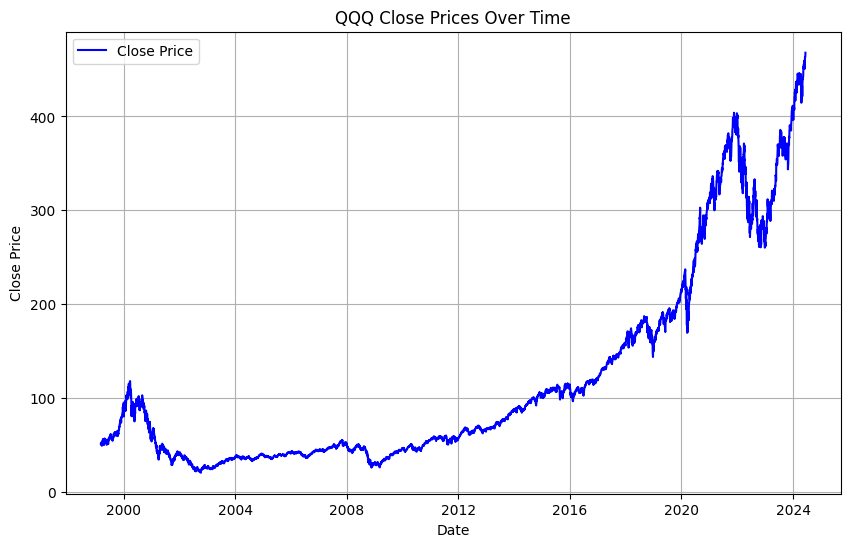

In [ ]:
# Ensure that Date column is parsed as datetime
df_qqq['Date'] = pd.to_datetime(df_qqq['Date'])

# Plot Close prices against Date
plt.figure(figsize=(10,6))
plt.plot(df_qqq['Date'], df_qqq['Close*'], label='Close Price', color='blue')

# Customize the chart
plt.title('QQQ Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

#Load up Bitcoin
#We have formatting issues, we'll address and search for ranges and missing values

In [ ]:
# Load the CSV file into a pandas DataFrame
df_btc_div = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Finance/BITCOIN%20USD%202000-2024.csv')

# Remove commas from numeric columns and convert to float
df_btc = df_btc_div.replace({',': ''}, regex=True).iloc[::-1]

# Convert the relevant columns to numeric types
df_btc[['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']] = df_btc[['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Print the cleaned DataFrame
print(df_btc)

# Print the range of values per column (min and max)
column_ranges_btc = df_btc.describe(include='all').loc[['min', 'max']]
print("___Range of Values per Column___")
print(column_ranges_btc)

# Print the number of missing values per column
print("___Missing Values___")
print(df_btc.isnull().sum())

           Date      Open      High       Low    Close*  Adj Close**  \
3674  17-Sep-14    465.86    468.17    452.42    457.33       457.33   
3673  18-Sep-14    456.86    456.86    413.10    424.44       424.44   
3672  19-Sep-14    424.10    427.83    384.53    394.80       394.80   
3671  20-Sep-14    394.67    423.30    389.88    408.90       408.90   
3670  21-Sep-14    408.08    412.43    393.18    398.82       398.82   
...         ...       ...       ...       ...       ...          ...   
4     04-Oct-24  60754.63  62465.99  60459.94  62067.48     62067.48   
3     05-Oct-24  62067.61  62371.02  61689.58  62089.95     62089.95   
2     06-Oct-24  62084.99  62959.57  61833.15  62818.95     62818.95   
1     07-Oct-24  62819.11  64443.71  62152.55  62236.66     62236.66   
0     08-Oct-24  62227.66  63082.70  61924.48  62274.57     62274.57   

           Volume  
3674     21056800  
3673     34483200  
3672     37919700  
3671     36863600  
3670     26580100  
...           .

In [ ]:
print(df_btc)

           Date      Open      High       Low    Close*  Adj Close**  \
3674  17-Sep-14    465.86    468.17    452.42    457.33       457.33   
3673  18-Sep-14    456.86    456.86    413.10    424.44       424.44   
3672  19-Sep-14    424.10    427.83    384.53    394.80       394.80   
3671  20-Sep-14    394.67    423.30    389.88    408.90       408.90   
3670  21-Sep-14    408.08    412.43    393.18    398.82       398.82   
...         ...       ...       ...       ...       ...          ...   
4     04-Oct-24  60754.63  62465.99  60459.94  62067.48     62067.48   
3     05-Oct-24  62067.61  62371.02  61689.58  62089.95     62089.95   
2     06-Oct-24  62084.99  62959.57  61833.15  62818.95     62818.95   
1     07-Oct-24  62819.11  64443.71  62152.55  62236.66     62236.66   
0     08-Oct-24  62227.66  63082.70  61924.48  62274.57     62274.57   

           Volume  
3674     21056800  
3673     34483200  
3672     37919700  
3671     36863600  
3670     26580100  
...           .

#Visualize for Cross check

<ipython-input-58-b279de4f9c09>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



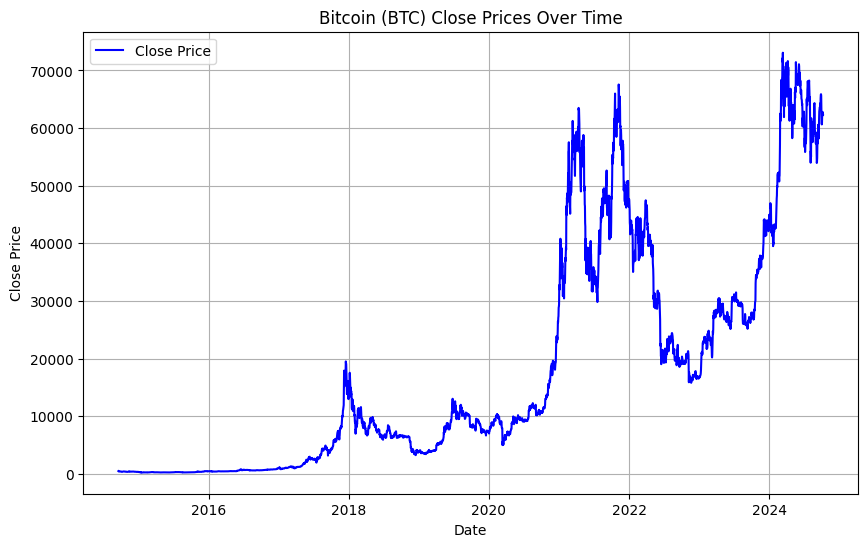

In [ ]:
# Ensure that Date column is parsed as datetime
df_btc['Date'] = pd.to_datetime(df_btc['Date'])

# Plot Close prices against Date
plt.figure(figsize=(10,6))
plt.plot(df_btc['Date'], df_btc['Close*'], label='Close Price', color='blue')

# Customize the chart
plt.title('Bitcoin (BTC) Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

#Load Crude Oil
We need to add header and format again

In [ ]:
# Load the CSV file into a pandas DataFrame
df_cl_div = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Finance/CL%202000-2024.csv', header=None)

# Add headers to the DataFrame
df_cl_div.columns = ['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']

# Remove commas from numeric columns and convert to float
df_cl = df_cl_div.replace({',': ''}, regex=True)

# Convert the relevant columns to numeric types
df_cl[['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']] = df_cl[['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Print the cleaned DataFrame
print(df_cl)

# Print the range of values per column (min and max)
column_ranges_cl = df_cl.describe(include='all').loc[['min', 'max']]
print("___Range of Values per Column___")
print(column_ranges_cl)

# Print the number of missing values per column
print("___Missing Values___")
print(df_cl.isnull().sum())

           Date   Open   High    Low  Close*  Adj Close**    Volume
0     07-Oct-24  74.40  77.40  73.62   77.14        77.14  428815.0
1     04-Oct-24  73.95  75.57  73.46   74.38        74.38  428815.0
2     03-Oct-24  70.98  74.09  70.52   73.71        73.71  460554.0
3     02-Oct-24  70.80  72.49  69.87   70.10        70.10  429225.0
4     01-Oct-24  68.41  71.94  66.33   69.83        69.83  668216.0
...         ...    ...    ...    ...     ...          ...       ...
6129  29-Aug-00  32.82  33.03  32.56   32.72        32.72   49131.0
6130  28-Aug-00  32.04  32.92  31.86   32.87        32.87   46770.0
6131  25-Aug-00  31.70  32.10  31.32   32.05        32.05   44601.0
6132  24-Aug-00  31.90  32.24  31.40   31.63        31.63   72978.0
6133  23-Aug-00  31.95  32.80  31.95   32.05        32.05   79385.0

[6134 rows x 7 columns]
___Range of Values per Column___
    Date    Open    High     Low  Close*  Adj Close**     Volume
min  NaN  -14.00   13.69  -40.32  -37.63       -37.63       2

#We have missing values to deal with
We drop the rows with all missing values and there are 7 entries with prices but no volume.

For these incomplete rows: we will impute the average of the last 7 entries as those volumes

In [ ]:
# Display all rows with missing values
missing_values_rows_cl_1 = df_cl[df_cl.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_values_rows_cl_1)

Rows with missing values:
           Date   Open   High    Low  Close*  Adj Close**  Volume
218   23-Nov-23    NaN    NaN    NaN     NaN          NaN     NaN
378   06-Apr-23  80.37  80.96  79.65   80.70        80.70     NaN
2175  15-Feb-16    NaN    NaN    NaN     NaN          NaN     NaN
2195  18-Jan-16    NaN    NaN    NaN     NaN          NaN     NaN
2902  29-Mar-13    NaN    NaN    NaN     NaN          NaN     NaN
...         ...    ...    ...    ...     ...          ...     ...
6066  24-Nov-00    NaN    NaN    NaN     NaN          NaN     NaN
6067  23-Nov-00    NaN    NaN    NaN     NaN          NaN     NaN
6069  21-Nov-00  35.40  35.70  35.00   35.15        35.15     NaN
6096  13-Oct-00  35.93  35.96  34.90   35.05        35.05     NaN
6125  04-Sep-00    NaN    NaN    NaN     NaN          NaN     NaN

[85 rows x 7 columns]


In [ ]:
# Drop rows where all specified columns have missing values
df_cl.dropna(subset=['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], how='all', inplace=True)

# Display all rows with missing values
missing_values_rows_cl = df_cl[df_cl.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_values_rows_cl)

Rows with missing values:
           Date   Open   High    Low  Close*  Adj Close**  Volume
378   06-Apr-23  80.37  80.96  79.65   80.70        80.70     NaN
5856  14-Sep-01  29.98  29.98  29.45   29.53        29.53     NaN
5860  10-Sep-01  27.75  28.00  27.57   27.63        27.63     NaN
5989  13-Mar-01  27.80  27.90  27.45   27.45        27.45     NaN
6006  16-Feb-01  29.20  29.25  29.10   29.16        29.16     NaN
6069  21-Nov-00  35.40  35.70  35.00   35.15        35.15     NaN
6096  13-Oct-00  35.93  35.96  34.90   35.05        35.05     NaN


In [ ]:
# Define the indices of the rows with missing values
missing_indices = [378, 5856, 5860, 5989, 6006, 6069, 6096]

# Iterate over each missing index and fill the 'Volume' with the average of the last 7 entries
for idx in missing_indices:
    # Ensure we are not trying to access out-of-bounds indices
    if idx >= 7:
        # Calculate the average of the 'Volume' column from the previous 7 rows
        avg_volume = df_cl.loc[idx-7:idx-1, 'Volume'].mean()
        # Fill the missing 'Volume' value with the calculated average
        df_cl.loc[idx, 'Volume'] = avg_volume

# Print the rows with previously missing values to check the update
missing_rows_updated = df_cl.loc[missing_indices]
print("___Updated Rows with Missing Values___")
print(missing_rows_updated)

# Check for any remaining missing values in the DataFrame
missing_values_summary = df_cl.isnull().sum()

# Print the summary of missing values
print("___Missing Values After Filling___")
print(missing_values_summary)

# Reverse the rows of df_cl to prep for visualization
df_cl = df_cl.iloc[::-1].reset_index(drop=True)

# Print the reversed DataFrame (optional)
print(df_cl)

___Updated Rows with Missing Values___
           Date   Open   High    Low  Close*  Adj Close**         Volume
378   06-Apr-23  80.37  80.96  79.65   80.70        80.70  254345.571429
5856  14-Sep-01  29.98  29.98  29.45   29.53        29.53   71853.142857
5860  10-Sep-01  27.75  28.00  27.57   27.63        27.63   62435.535714
5989  13-Mar-01  27.80  27.90  27.45   27.45        27.45   71896.142857
6006  16-Feb-01  29.20  29.25  29.10   29.16        29.16   72207.666667
6069  21-Nov-00  35.40  35.70  35.00   35.15        35.15   65714.200000
6096  13-Oct-00  35.93  35.96  34.90   35.05        35.05   62851.000000
___Missing Values After Filling___
Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64
           Date   Open   High    Low  Close*  Adj Close**    Volume
0     23-Aug-00  31.95  32.80  31.95   32.05        32.05   79385.0
1     24-Aug-00  31.90  32.24  31.40   31.63        31.63   72978.0
2     

#Visualize


<ipython-input-63-9d80f5bc61d9>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



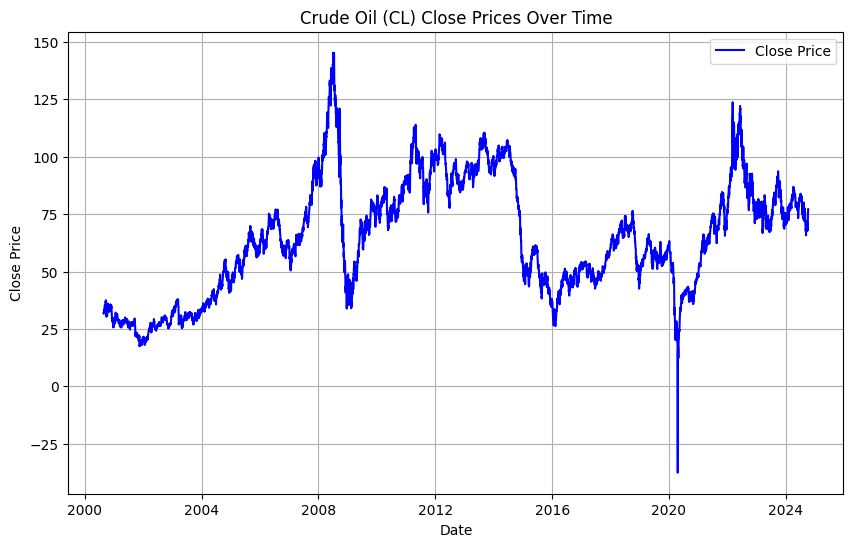

In [ ]:
# Ensure that Date column is parsed as datetime
df_cl['Date'] = pd.to_datetime(df_cl['Date'])

# Plot Close prices against Date
plt.figure(figsize=(10,6))
plt.plot(df_cl['Date'], df_cl['Close*'], label='Close Price', color='blue')

# Customize the chart
plt.title('Crude Oil (CL) Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

#Load Gold

In [ ]:
# Load the CSV file into a pandas DataFrame
df_gold_raw = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Finance/GOLD%202000-2024.csv')

# Display the DataFrame
print(df_gold_raw)

# Remove commas from numeric columns and convert to float
df_gold_raw = df_gold_raw.replace({',': ''}, regex=True)

# Convert the relevant columns to numeric types
df_gold_raw[['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']] = df_gold_raw[['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Print the range of values per column
column_ranges_gold_raw = df_gold_raw.describe(include='all').transpose()[['min', 'max']]
print("___Range of Values per Column___")
print(column_ranges_gold_raw)

# Print the number of missing values per column
print("___Missing Values___")
print(df_gold_raw.isnull().sum())

           Date      Open      High       Low    Close* Adj Close** Volume
0     07-Oct-24  2,648.70  2,657.40  2,639.00  2,644.80    2,644.80    114
1     04-Oct-24  2,656.00  2,667.00  2,639.00  2,645.80    2,645.80    114
2     03-Oct-24  2,642.80  2,657.10  2,640.00  2,657.10    2,657.10    354
3     02-Oct-24  2,650.60  2,657.20  2,640.00  2,647.10    2,647.10     72
4     01-Oct-24  2,631.40  2,670.90  2,631.40  2,667.30    2,667.30    153
...         ...       ...       ...       ...       ...         ...    ...
6124  05-Sep-00     275.8     275.8     275.8     275.8       275.8      2
6125  04-Sep-00         -         -         -         -           -      -
6126  01-Sep-00       277       277       277       277         277      -
6127  31-Aug-00     274.8     278.3     274.8     278.3       278.3      -
6128  30-Aug-00     273.9     273.9     273.9     273.9       273.9      -

[6129 rows x 7 columns]
___Range of Values per Column___
               min       max
Date         

In [ ]:
# Display all rows with missing values
missing_values_rows_gold_1 = df_gold_raw[df_gold_raw.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_values_rows_gold_1)

Rows with missing values:
           Date    Open    High     Low  Close*  Adj Close**  Volume
218   23-Nov-23     NaN     NaN     NaN     NaN          NaN     NaN
378   06-Apr-23  2022.2  2023.3  2005.0  2011.9       2011.9     NaN
595   25-May-22  1846.2  1846.2  1846.2  1846.2       1846.2     NaN
773   10-Sep-21  1789.6  1789.6  1789.6  1789.6       1789.6     NaN
1351  28-May-19  1276.5  1276.5  1276.5  1276.5       1276.5     NaN
...         ...     ...     ...     ...     ...          ...     ...
6123  06-Sep-00   274.2   274.2   274.2   274.2        274.2     NaN
6125  04-Sep-00     NaN     NaN     NaN     NaN          NaN     NaN
6126  01-Sep-00   277.0   277.0   277.0   277.0        277.0     NaN
6127  31-Aug-00   274.8   278.3   274.8   278.3        278.3     NaN
6128  30-Aug-00   273.9   273.9   273.9   273.9        273.9     NaN

[495 rows x 7 columns]


#Drop rows with all missing values, keep rows with only volume missing and impute those values basd on the average of the previous 7 entries

In [ ]:
# Drop rows where all specified columns have missing values
df_gold_raw.dropna(subset=['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], how='all', inplace=True)

# Display all rows with missing values
missing_values_rows_gold_2 = df_gold_raw[df_gold_raw.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_values_rows_gold_2)

Rows with missing values:
           Date    Open    High     Low  Close*  Adj Close**  Volume
378   06-Apr-23  2022.2  2023.3  2005.0  2011.9       2011.9     NaN
595   25-May-22  1846.2  1846.2  1846.2  1846.2       1846.2     NaN
773   10-Sep-21  1789.6  1789.6  1789.6  1789.6       1789.6     NaN
1351  28-May-19  1276.5  1276.5  1276.5  1276.5       1276.5     NaN
1353  23-May-19  1284.8  1284.8  1284.8  1284.8       1284.8     NaN
...         ...     ...     ...     ...     ...          ...     ...
6121  08-Sep-00   273.3   273.3   273.3   273.3        273.3     NaN
6123  06-Sep-00   274.2   274.2   274.2   274.2        274.2     NaN
6126  01-Sep-00   277.0   277.0   277.0   277.0        277.0     NaN
6127  31-Aug-00   274.8   278.3   274.8   278.3        278.3     NaN
6128  30-Aug-00   273.9   273.9   273.9   273.9        273.9     NaN

[413 rows x 7 columns]


In [ ]:
# Identify rows with missing values in the 'Volume' column
missing_indices_gold = df_gold_raw[df_gold_raw['Volume'].isnull()].index

# Iterate over each missing index and fill the 'Volume' with the average of the last 7 entries
for idx in missing_indices_gold:
    # Ensure we are not trying to access out-of-bounds indices
    if idx >= 7:
        # Calculate the average of the 'Volume' column from the previous 7 rows
        avg_volume = df_gold_raw.loc[idx-7:idx-1, 'Volume'].mean()
        # Fill the missing 'Volume' value with the calculated average
        df_gold_raw.loc[idx, 'Volume'] = avg_volume

# Check for any remaining missing values in df_gold_raw
missing_values_summary_gold = df_gold_raw.isnull().sum()

# Print the summary of missing values
print("___Missing Values After Filling in df_gold_raw___")
print(missing_values_summary_gold)

# Reverse the rows of df_gold_raw
df_gold = df_gold_raw.iloc[::-1].reset_index(drop=True)

# Print the reversed DataFrame (optional)
print(df_gold)

___Missing Values After Filling in df_gold_raw___
Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64
           Date    Open    High     Low  Close*  Adj Close**      Volume
0     30-Aug-00   273.9   273.9   273.9   273.9        273.9  571.011328
1     31-Aug-00   274.8   278.3   274.8   278.3        278.3  641.392417
2     01-Sep-00   277.0   277.0   277.0   277.0        277.0  699.238222
3     05-Sep-00   275.8   275.8   275.8   275.8        275.8    2.000000
4     06-Sep-00   274.2   274.2   274.2   274.2        274.2  890.498413
...         ...     ...     ...     ...     ...          ...         ...
6042  01-Oct-24  2631.4  2670.9  2631.4  2667.3       2667.3  153.000000
6043  02-Oct-24  2650.6  2657.2  2640.0  2647.1       2647.1   72.000000
6044  03-Oct-24  2642.8  2657.1  2640.0  2657.1       2657.1  354.000000
6045  04-Oct-24  2656.0  2667.0  2639.0  2645.8       2645.8  114.000000
6046  07-Oct-24

#Visualize

<ipython-input-68-4009d11fc803>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



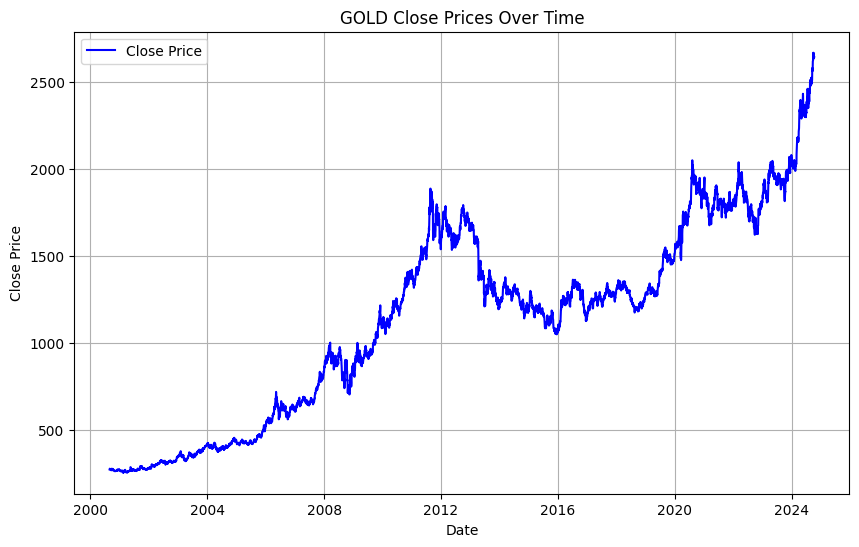

In [ ]:
# Ensure that Date column is parsed as datetime
df_gold['Date'] = pd.to_datetime(df_gold['Date'])

# Plot Close prices against Date
plt.figure(figsize=(10,6))
plt.plot(df_gold['Date'], df_gold['Close*'], label='Close Price', color='blue')

# Customize the chart
plt.title('GOLD Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

#Finally, import the inflation Index

    Year  Index % Increase
0   1993  144.5      3.00%
1   1994  148.2      2.60%
2   1995  152.4      2.80%
3   1996  156.9      2.90%
4   1997  160.5      2.30%
5   1998  163.0      1.60%
6   1999  166.6      2.20%
7   2000  172.2      3.40%
8   2001  177.1      2.80%
9   2002  179.9      1.60%
10  2003  184.0      2.30%
11  2004  188.9      2.70%
12  2005  195.3      3.40%
13  2006  201.6      3.20%
14  2007  207.3      2.90%
15  2008  215.3      3.80%
16  2009  214.5     -0.40%
17  2010  218.1      1.60%
18  2011  224.9      3.20%
19  2012  229.6      2.10%
20  2013  233.0      1.50%
21  2014  236.7      1.60%
22  2015  237.0      0.10%
23  2016  240.0      1.30%
24  2017  245.1      2.10%
25  2018  251.1      2.40%
26  2019  255.7      1.80%
27  2020  258.8      1.20%
28  2021  271.0      4.70%
29  2022  292.7      8.00%
30  2023  304.7      4.10%
31  2024  314.4      3.20%


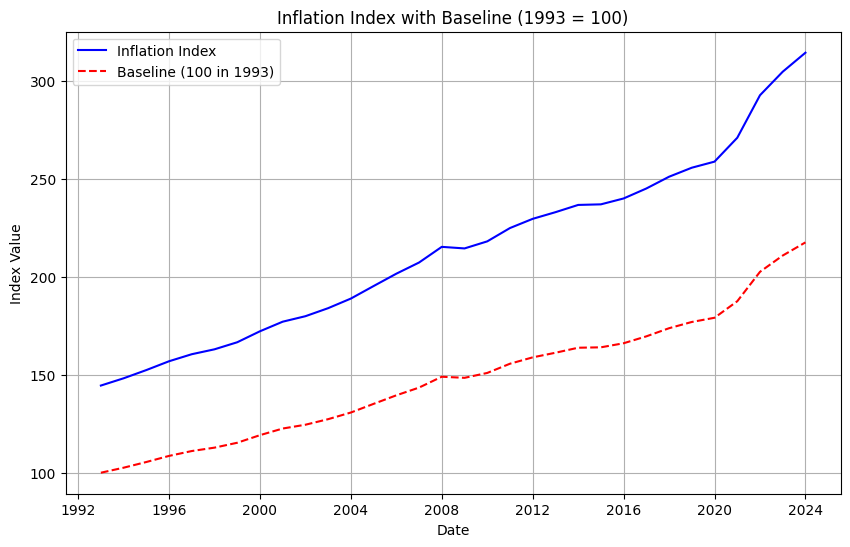

         Date  Index % Increase  Baseline 1993
0  1993-01-01  144.5      3.00%     100.000000
1  1994-01-01  148.2      2.60%     102.560554
2  1995-01-01  152.4      2.80%     105.467128
3  1996-01-01  156.9      2.90%     108.581315
4  1997-01-01  160.5      2.30%     111.072664
5  1998-01-01  163.0      1.60%     112.802768
6  1999-01-01  166.6      2.20%     115.294118
7  2000-01-01  172.2      3.40%     119.169550
8  2001-01-01  177.1      2.80%     122.560554
9  2002-01-01  179.9      1.60%     124.498270
10 2003-01-01  184.0      2.30%     127.335640
11 2004-01-01  188.9      2.70%     130.726644
12 2005-01-01  195.3      3.40%     135.155709
13 2006-01-01  201.6      3.20%     139.515571
14 2007-01-01  207.3      2.90%     143.460208
15 2008-01-01  215.3      3.80%     148.996540
16 2009-01-01  214.5     -0.40%     148.442907
17 2010-01-01  218.1      1.60%     150.934256
18 2011-01-01  224.9      3.20%     155.640138
19 2012-01-01  229.6      2.10%     158.892734
20 2013-01-01

In [ ]:
# Load the CSV file into a pandas DataFrame
df_inflation_raw = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Finance/Inflation%20Index%201993-2024.csv')

# Strip leading/trailing spaces from the 'Year' column
df_inflation_raw['Year'] = df_inflation_raw['Year'].str.strip()

# Display the DataFrame
print(df_inflation_raw)

# Ensure that Year column is parsed as datetime
df_inflation_raw['Year'] = pd.to_datetime(df_inflation_raw['Year'], format='%Y')

# Rename 'Year' column to 'Date'
df_inflation_raw.rename(columns={'Year': 'Date'}, inplace=True)

# Set 1993 as the baseline with a value of 100
baseline_value = df_inflation_raw.loc[df_inflation_raw['Date'] == pd.to_datetime('1993'), 'Index'].values[0]

# Create a new series where 1993 is the baseline (100) and grows proportionally
df_inflation_raw['Baseline 1993'] = (df_inflation_raw['Index'] / baseline_value) * 100

# Plot the Index values and the Baseline against Date
plt.figure(figsize=(10,6))
plt.plot(df_inflation_raw['Date'], df_inflation_raw['Index'], label='Inflation Index', color='blue')
plt.plot(df_inflation_raw['Date'], df_inflation_raw['Baseline 1993'], label='Baseline (100 in 1993)', color='red', linestyle='--')

# Customize the chart
plt.title('Inflation Index with Baseline (1993 = 100)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Display the updated DataFrame
print(df_inflation_raw)



#Import VIX
Format was difficult to deal with.  We needed to use drop rows, extract the values from space-seperated values and extract the date.  All values where in strings that needed to be properly applied to column headers that we decided.  Volume was ignored as it has no basis or values here.

In [ ]:
# Load the raw data
url = 'https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Finance/VIX%201990-2024.csv'

# Read the CSV file with no specific delimiter since it's irregular
df_vix_raw = pd.read_csv(url, header=None, skip_blank_lines=True)

# Drop completely empty rows
df_vix_raw = df_vix_raw.dropna(how='all')

# The relevant data is in the first column, so we clean and split that column
# Modified the regex pattern to properly capture the values
df_vix = df_vix_raw[0].str.extract(r'(?P<Date>[\w\s,]+)\s+(?P<Open>\d+\.\d+)\s+(?P<High>\d+\.\d+)\s+(?P<Low>\d+\.\d+)\s+(?P<Close>\d+\.\d+)\s+(?P<AdjClose>\d+\.\d+)\s')

# Convert 'Date' column to datetime format for better handling
df_vix['Date'] = pd.to_datetime(df_vix['Date'], errors='coerce')

# Display the cleaned DataFrame
print(df_vix)

# Print the range of values per column
column_ranges_vix = df_vix.describe(include='all').transpose()[['min', 'max']]
print("___Range of Values per Column___")
print(column_ranges_vix)

# Print the number of missing values per column
print("___Missing Values___")
print(df_vix.isnull().sum())


            Date   Open   High    Low  Close AdjClose
0            NaT    NaN    NaN    NaN    NaN      NaN
2     2024-09-25  15.82  15.82  15.17  15.41    15.41
4     2024-09-24  15.87  16.67  15.27  15.39    15.39
6     2024-09-23  16.71  16.95  15.75  15.89    15.89
8     2024-09-20  16.35  16.68  15.81  16.15    16.15
...          ...    ...    ...    ...    ...      ...
18216        NaT  26.34  24.64  20.05  22.44    22.20
18218        NaT    NaN    NaN    NaN    NaN      NaN
18220        NaT    NaN    NaN    NaN    NaN      NaN
18222        NaT    NaN    NaN    NaN    NaN      NaN
18224        NaT    NaN    NaN    NaN    NaN      NaN

[9006 rows x 6 columns]
___Range of Values per Column___
                          min                  max
Date      1990-01-16 00:00:00  2024-09-25 00:00:00
Open                      NaN                  NaN
High                      NaN                  NaN
Low                       NaN                  NaN
Close                     NaN          

#Deal with missing values
We have plenty, but they all seem to be associated with missing dates.

In [ ]:
# Display all rows with missing values
missing_values_rows_vix = df_vix[df_vix.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_values_rows_vix)

# Print the number of missing values per column
print("___Missing Values___")
print(df_vix.isnull().sum())

Rows with missing values:
      Date   Open   High    Low  Close AdjClose
0      NaT    NaN    NaN    NaN    NaN      NaN
58     NaT    NaN    NaN    NaN    NaN      NaN
177    NaT    NaN    NaN    NaN    NaN      NaN
235    NaT    NaN    NaN    NaN    NaN      NaN
295    NaT    NaN    NaN    NaN    NaN      NaN
...    ...    ...    ...    ...    ...      ...
18216  NaT  26.34  24.64  20.05  22.44    22.20
18218  NaT    NaN    NaN    NaN    NaN      NaN
18220  NaT    NaN    NaN    NaN    NaN      NaN
18222  NaT    NaN    NaN    NaN    NaN      NaN
18224  NaT    NaN    NaN    NaN    NaN      NaN

[313 rows x 6 columns]
___Missing Values___
Date        313
Open        308
High        308
Low         308
Close       308
AdjClose    308
dtype: int64


#Drop them all - we had a very rough import on this dataset.  
Due to our copy/paste from Yahoo Finance.  We have what we need though.

In [ ]:
# Drop rows where all specified columns have missing values
df_vix.dropna(subset=['Date'], how='all', inplace=True)
df_vix = df_vix.reset_index(drop=True)
# Print the number of missing values per column
print("___Missing Values___")
print(df_vix.isnull().sum())
print(df_vix.dtypes)
# Display the DataFrame with the new index
print(df_vix)


___Missing Values___
Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
dtype: int64
Date        datetime64[ns]
Open                object
High                object
Low                 object
Close              float64
AdjClose            object
dtype: object
           Date   Open   High    Low  Close AdjClose
0    2024-09-25  15.82  15.82  15.17  15.41    15.41
1    2024-09-24  15.87  16.67  15.27  15.39    15.39
2    2024-09-23  16.71  16.95  15.75  15.89    15.89
3    2024-09-20  16.35  16.68  15.81  16.15    16.15
4    2024-09-19  17.21  17.27  16.21  16.33    16.33
...         ...    ...    ...    ...    ...      ...
8688 1990-01-22  26.70  26.70  26.70  26.70    26.70
8689 1990-01-19  22.50  22.50  22.50  22.50    22.50
8690 1990-01-18  24.34  24.34  24.34  24.34    24.34
8691 1990-01-17  24.16  24.16  24.16  24.16    24.16
8692 1990-01-16  24.18  24.18  24.18  24.18    24.18

[8693 rows x 6 columns]


#Visualize

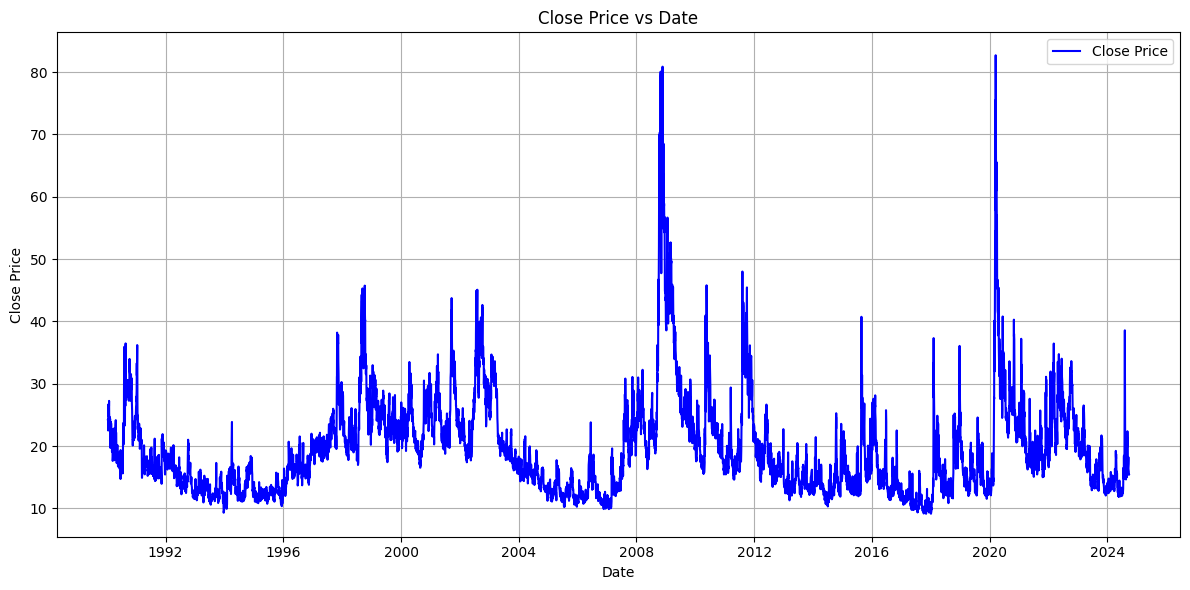

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_vix is your DataFrame

# Ensure 'Date' is in datetime format
df_vix['Date'] = pd.to_datetime(df_vix['Date'])
df_vix['Close'] = pd.to_numeric(df_vix['Close'], errors='coerce')

# Plotting Close price vs Date
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df_vix['Date'], df_vix['Close'], color='blue', label='Close Price')  # Plot the close price
plt.title('Close Price vs Date')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Close Price')  # Y-axis label
plt.grid(True)  # Show grid lines for better readability
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot


#Export cleaned datasets

In [ ]:
# Export files to CSV
#df_inflation_raw.to_csv('inflation_data_clean.csv', index=False)
#df_spy.to_csv('spy_data_clean.csv', index=False)
#df_qqq.to_csv('qqq_data_clean.csv', index=False)
#df_cl.to_csv('cl_data_clean.csv', index=False)
#df_gold.to_csv('gold_data_clean.csv', index=False
#df_btc.to_csv('btc_data_clean.csv', index=False)
#df_vix.to_csv('vix_data_clean.csv', index=False)

In [ ]:
#from google.colab import files
#files.download('inflation_data_clean.csv')

In [ ]:
#files.download('spy_data_clean.csv')


In [ ]:
#files.download('qqq_data_clean.csv')


In [ ]:
#files.download('cl_data_clean.csv')


In [ ]:
#files.download('gold_data_clean.csv')


In [ ]:
#files.download('btc_data_clean.csv')

In [ ]:
#files.download('vix_data_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>